In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re
nltk.download('vader_lexicon')
from datetime import datetime
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [49]:
df = pd.read_csv(r'C:\Users\BHAVANA\OneDrive\Desktop\Streams\Data Analytics\capx\twitter_stocks_data.csv',low_memory=False)
df.dropna(subset=['Tweet', 'Date', 'Stock Name', 'Company Name'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Tweet Stock Name Company Name  \
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.   
1  $AAPL and $TSLA have seen big inflows from ret...       TSLA  Tesla, Inc.   
2  Elon making burn jokes is bullish.\n\n$TSLA ht...       TSLA  Tesla, Inc.   
3  $TSLA Since 2019, legacy auto has made up for ...       TSLA  Tesla, Inc.   
6  Bears This Week\n$SPY $QQQ $TSLA https://t.co/...       TSLA  Tesla, Inc.   

        Date        OPEN        High         Low       Close   Adj Close  \
0 2022-09-29  282.760010  283.649994  265.779999  268.209992  268.209992   
1 2022-09-28  283.079987  289.000000  277.570007  287.809998  287.809998   
2 2022-09-27  283.839996  288.670013  277.510010  282.940002  282.940002   
3 2022-09-26  271.829987  284.089996  270.309998  276.010010  276.010010   
6 2022-09-23  283.089996  284.500000  272.820007  275.329987  275.329987   

       Volume  
0  77620600.0  
1  54664800.0  
2  61925200.0  
3  58076900.0  
6  63748400.0

In [50]:
def clean_tweet(tweet):
    if isinstance(tweet, str):
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
        tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
        tweet = re.sub(r'[^\w\s]', '', tweet)
        return tweet.lower()
    return ''

df['cleaned_tweet'] = df['Tweet'].apply(clean_tweet)

In [51]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']
df['Sentiment'] = df['Tweet'].apply(get_sentiment)
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df['Sentiment_Label'].value_counts()

Sentiment_Label
Positive    2238
Neutral     1223
Negative     723
Name: count, dtype: int64

In [52]:
mentions = df.groupby('Stock Name').size().reset_index(name='Mentions')
df = df.merge(mentions, on='Stock Name')
df['Price_Diff'] = df['Close'] - df['OPEN']

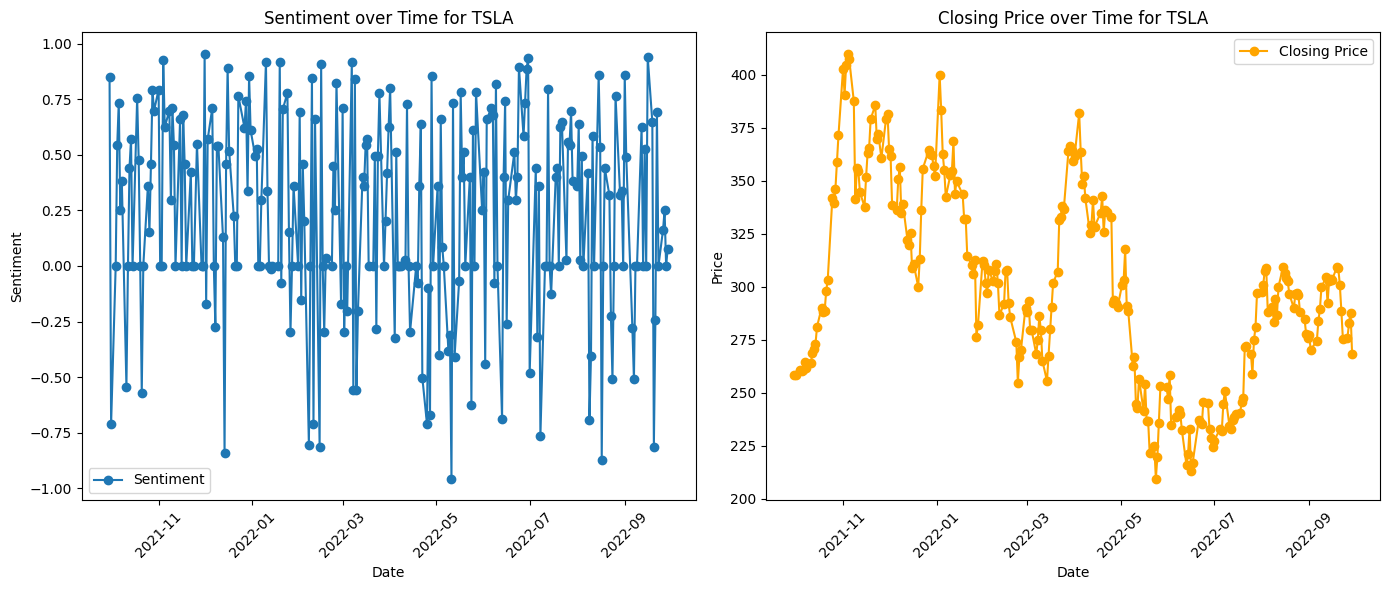

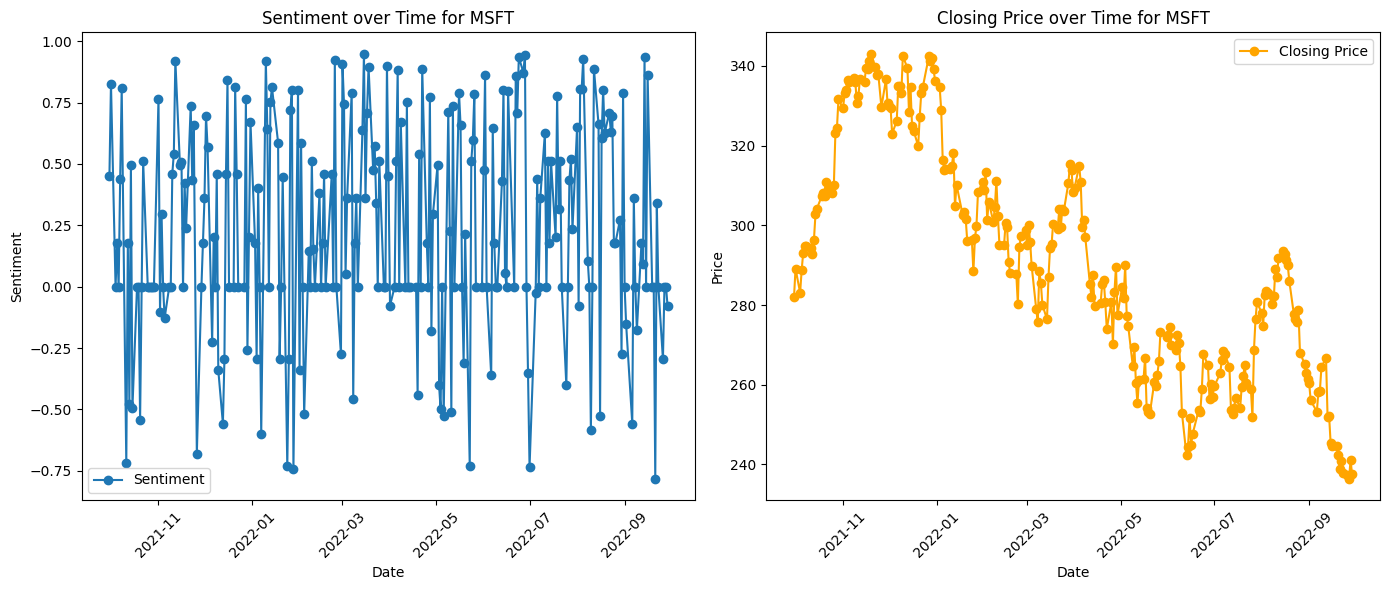

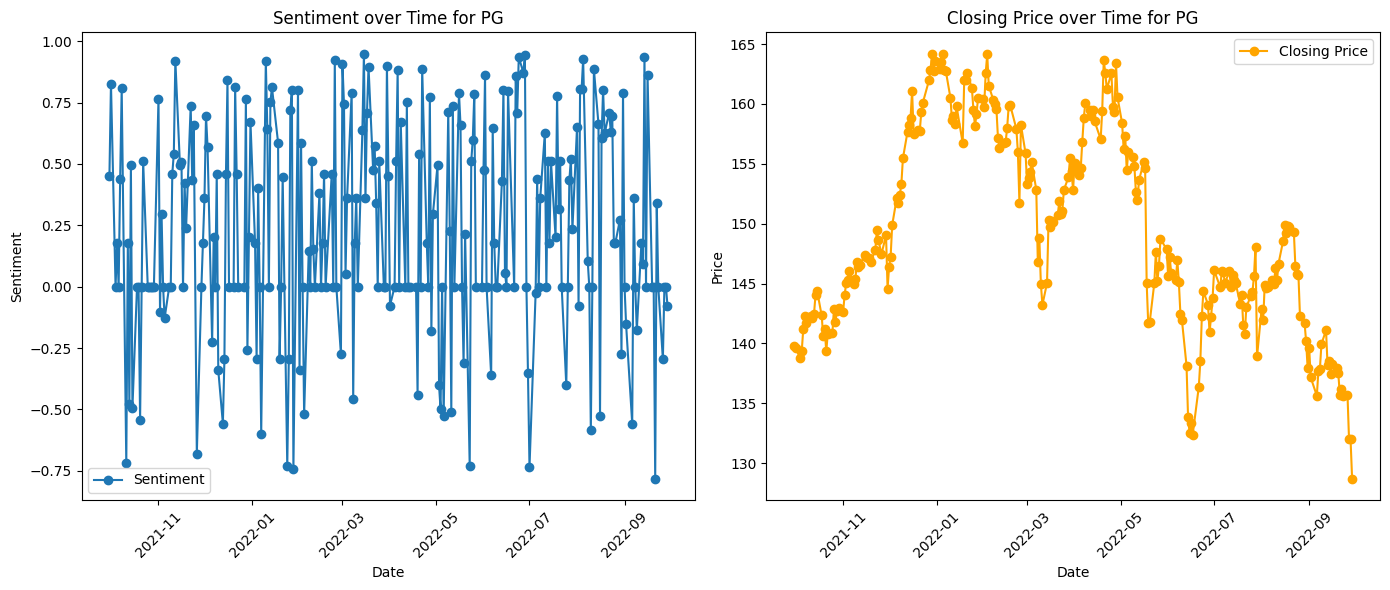

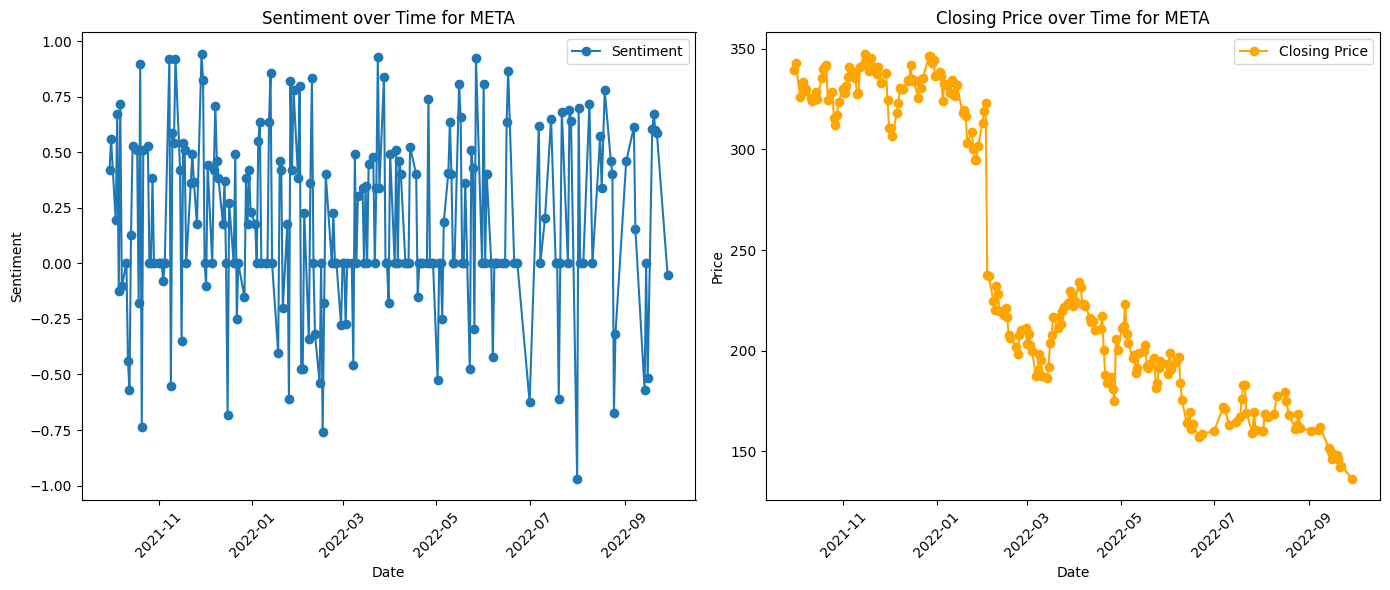

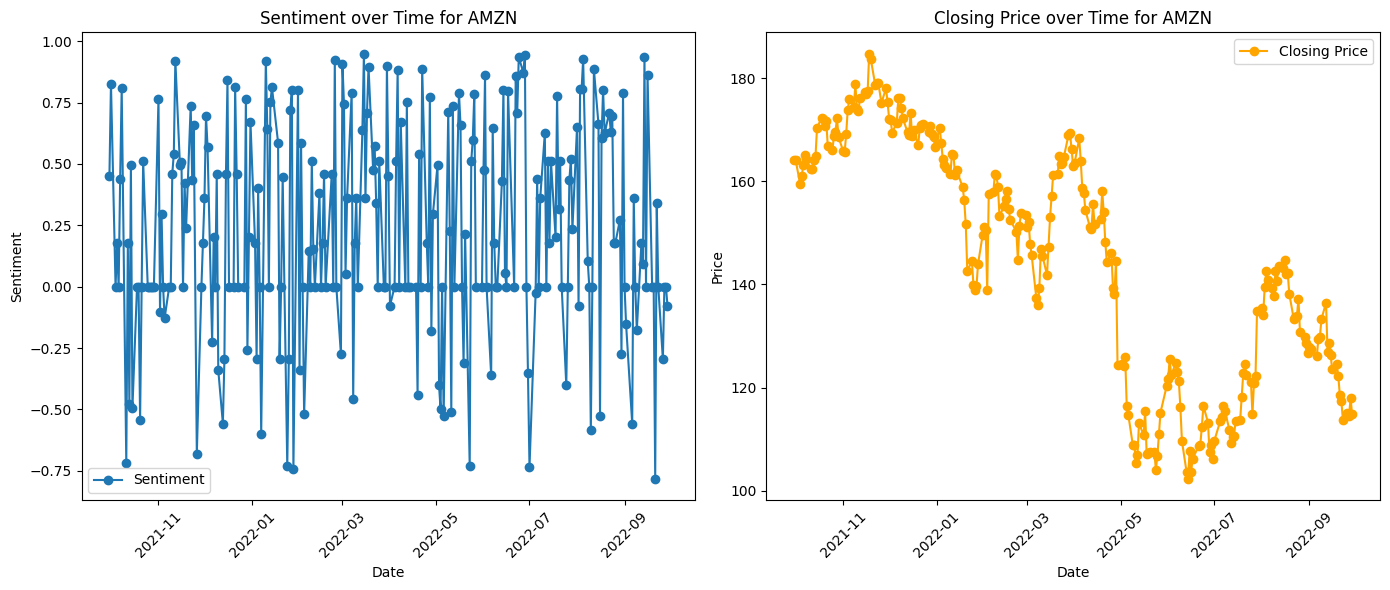

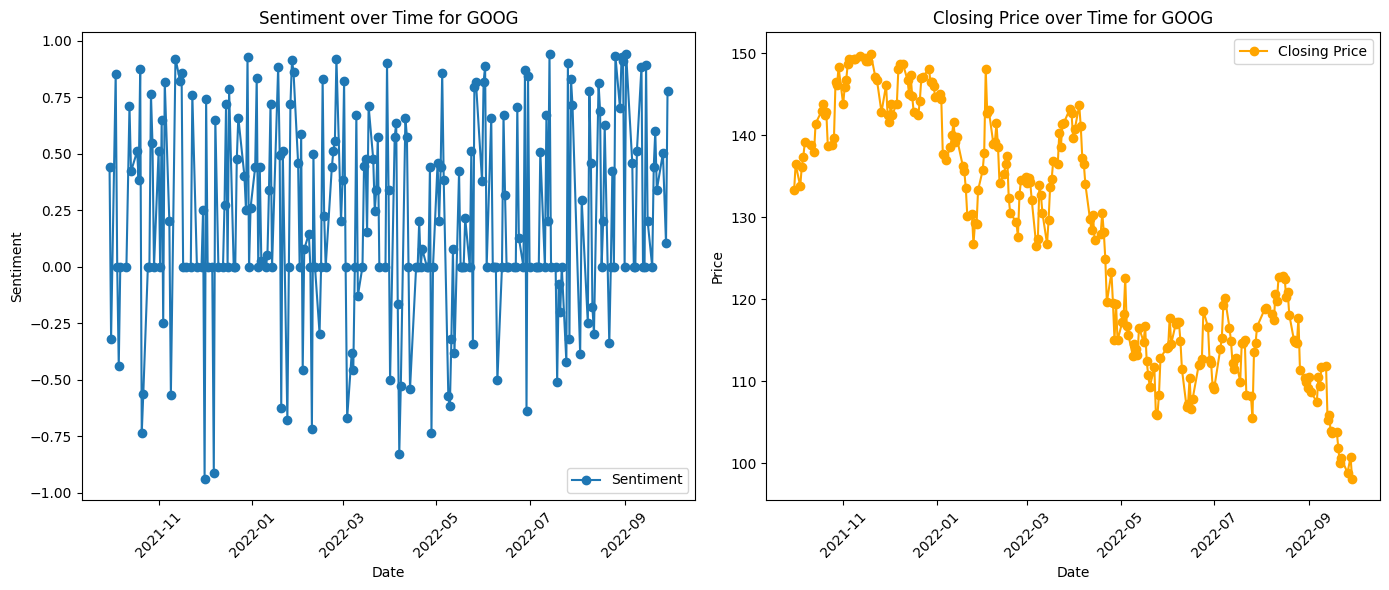

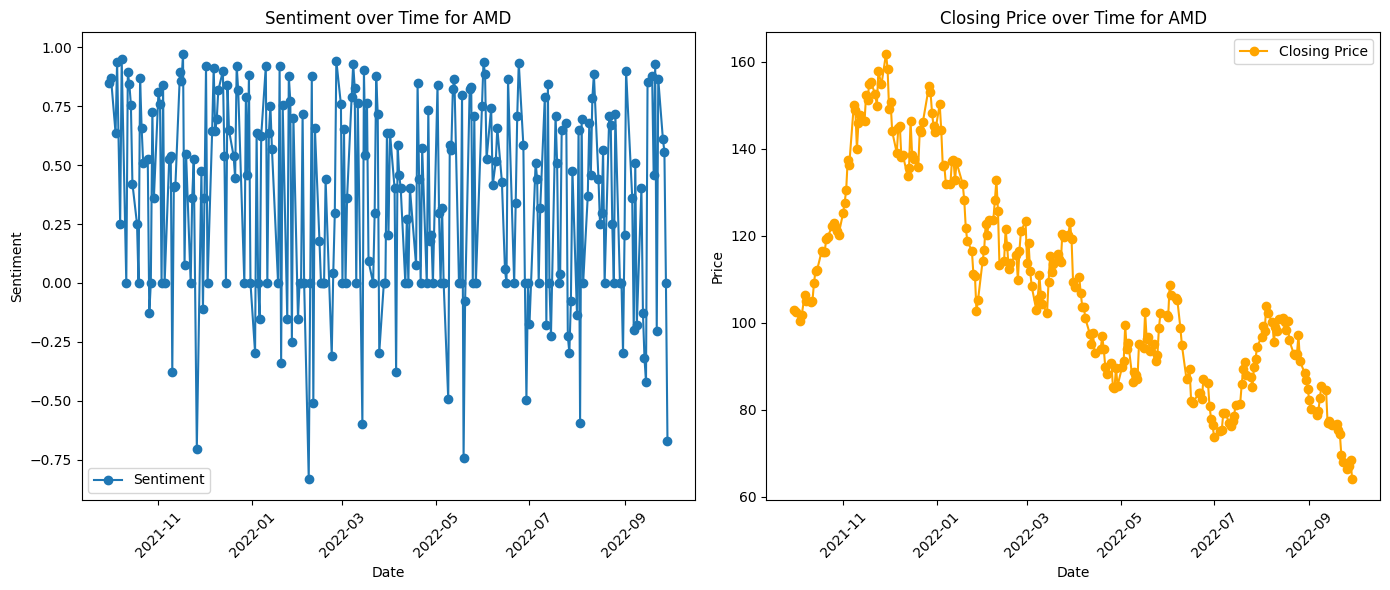

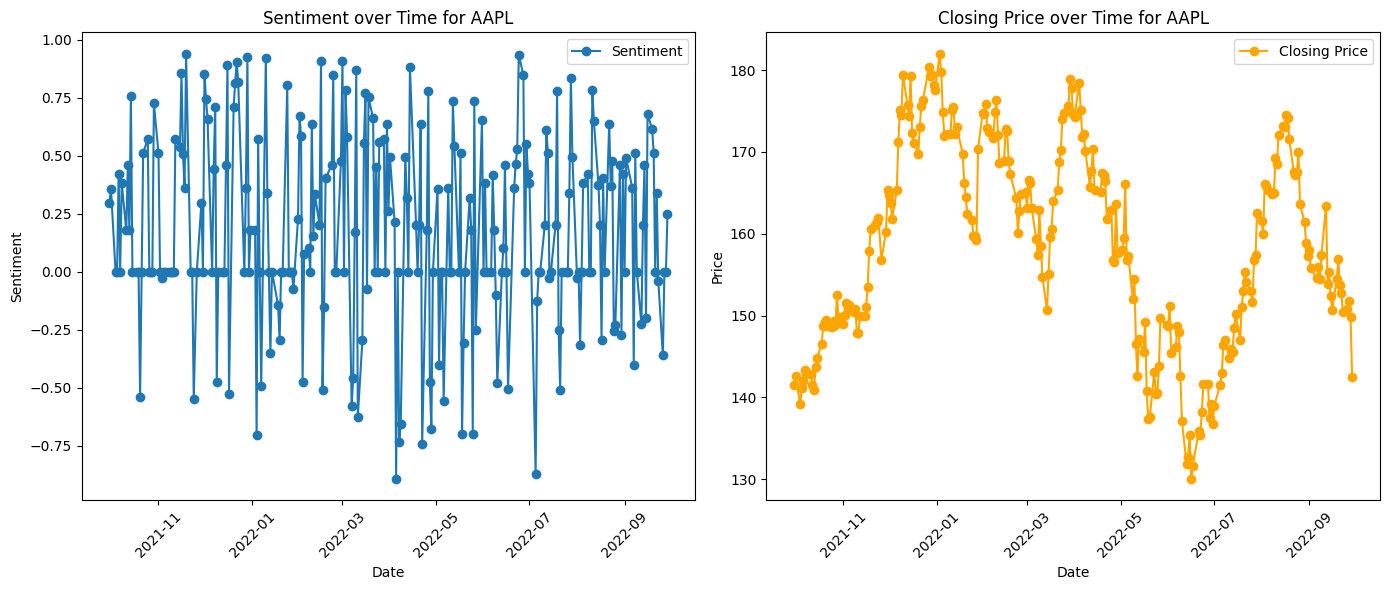

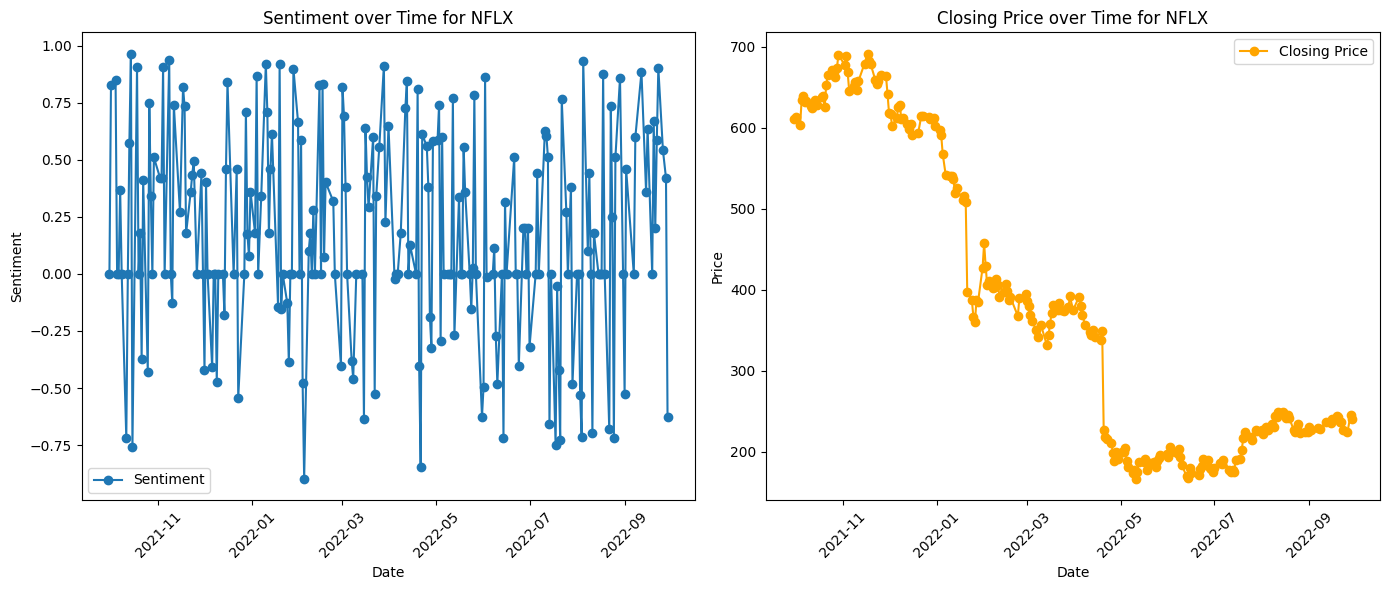

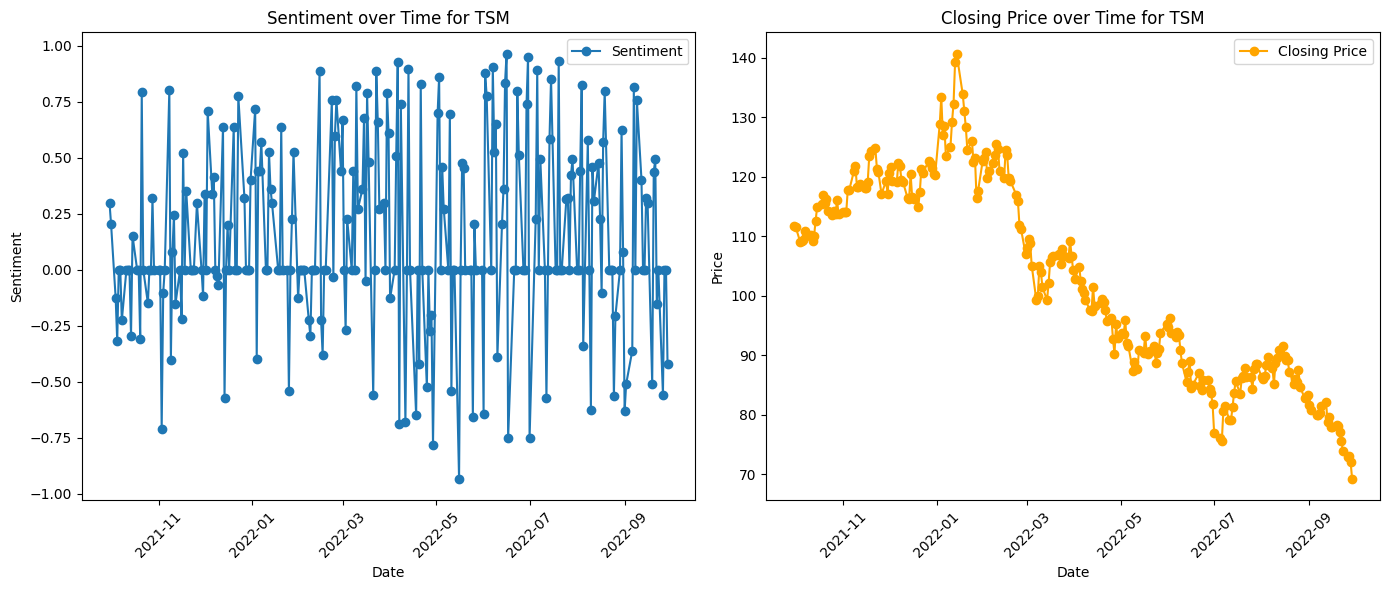

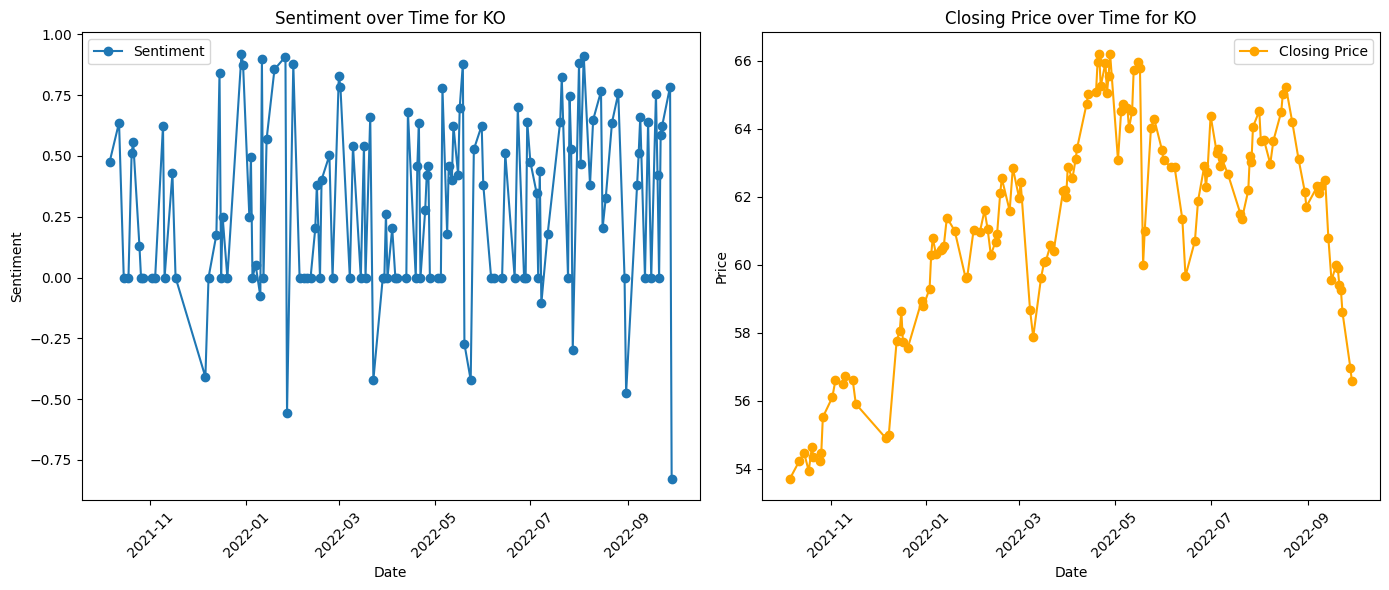

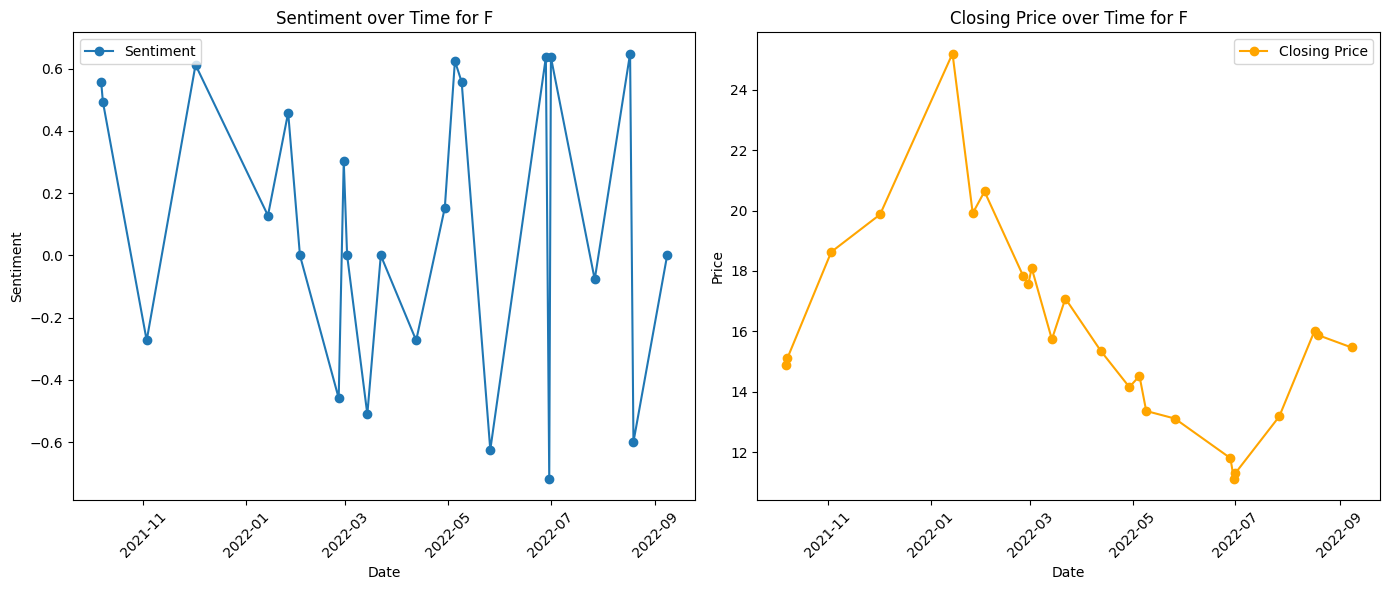

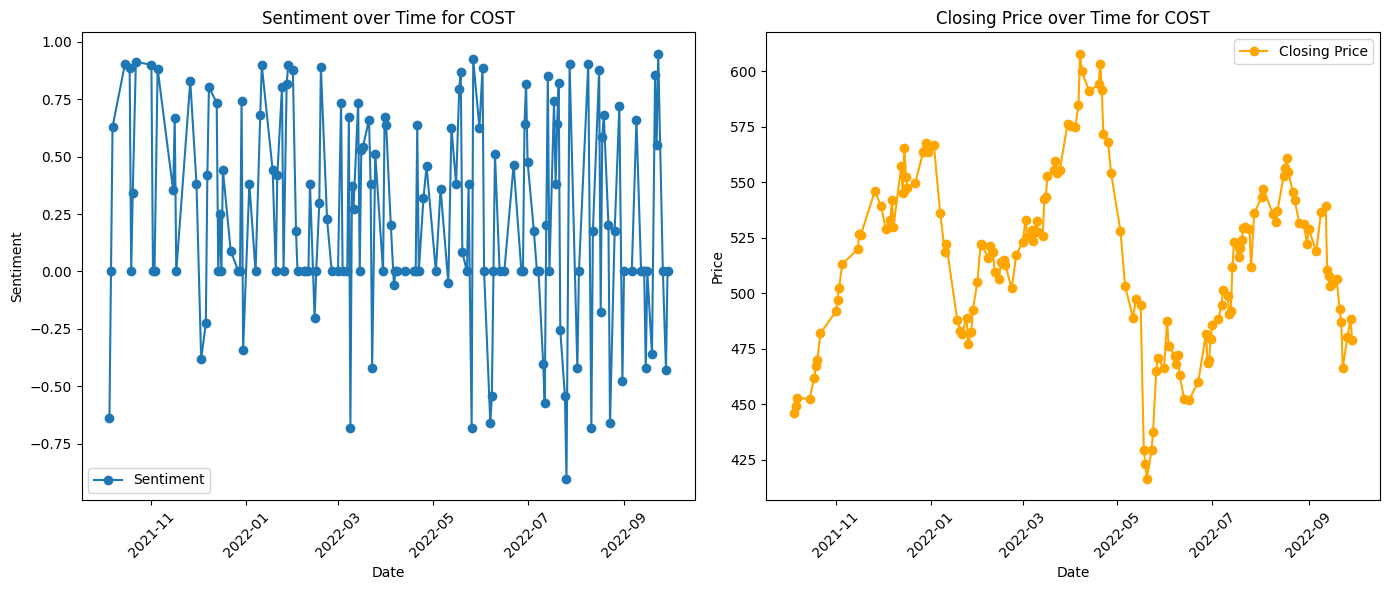

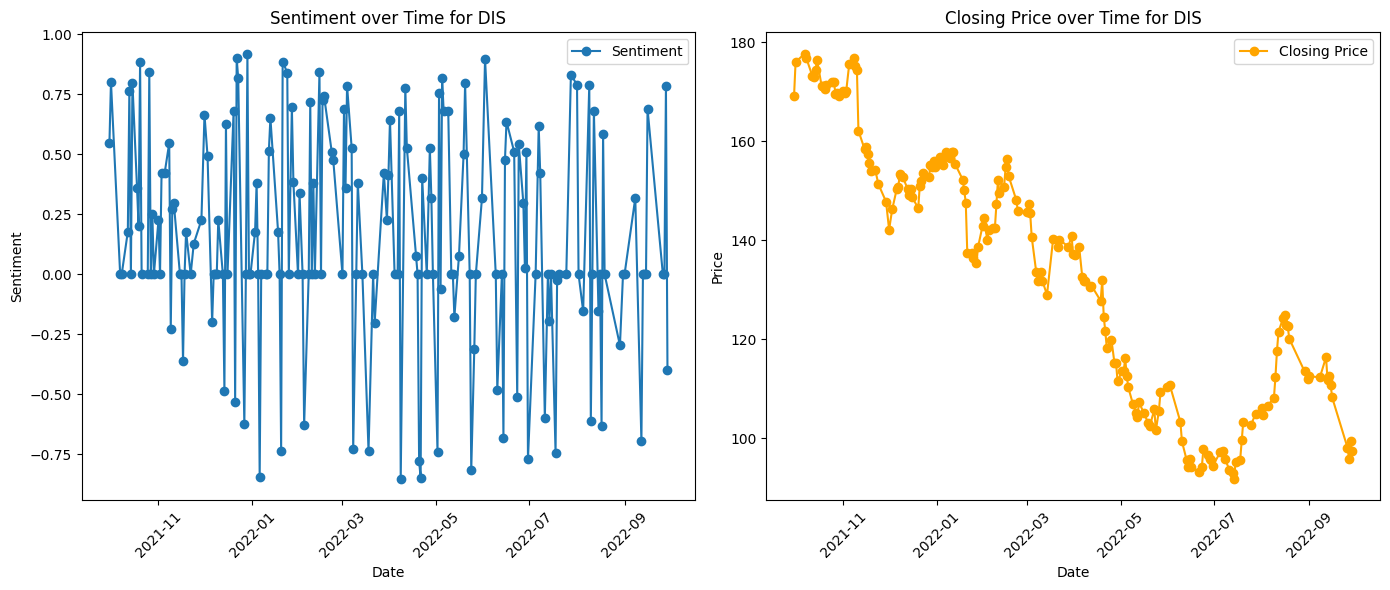

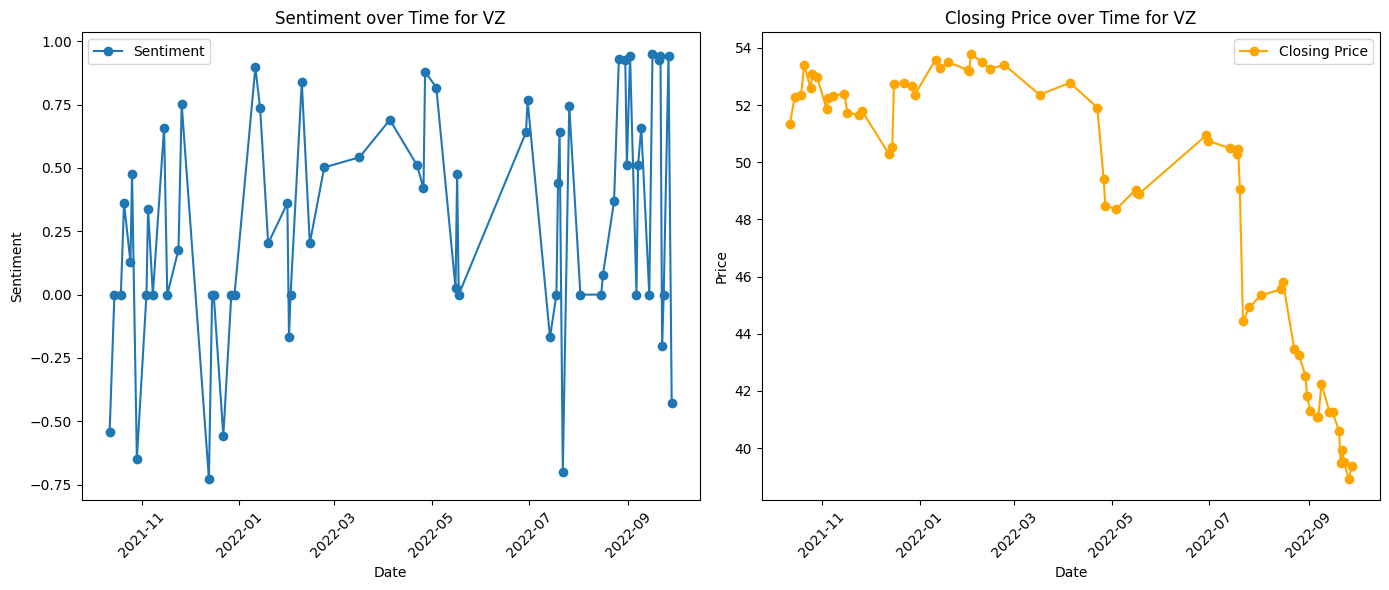

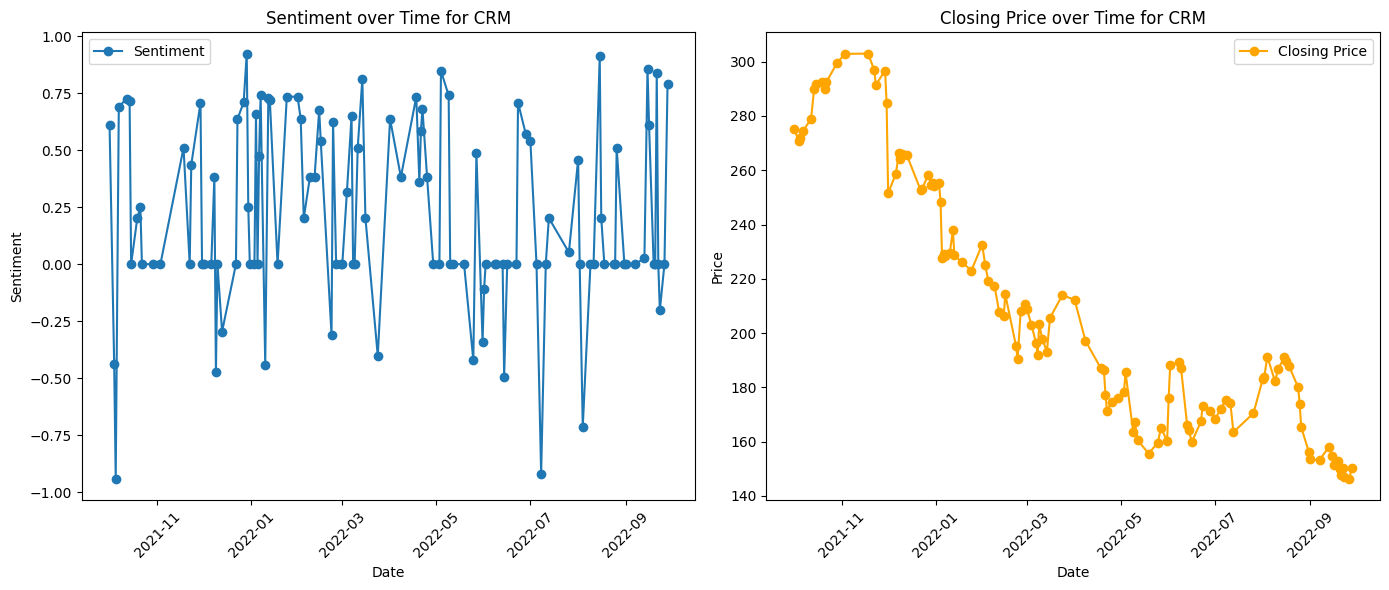

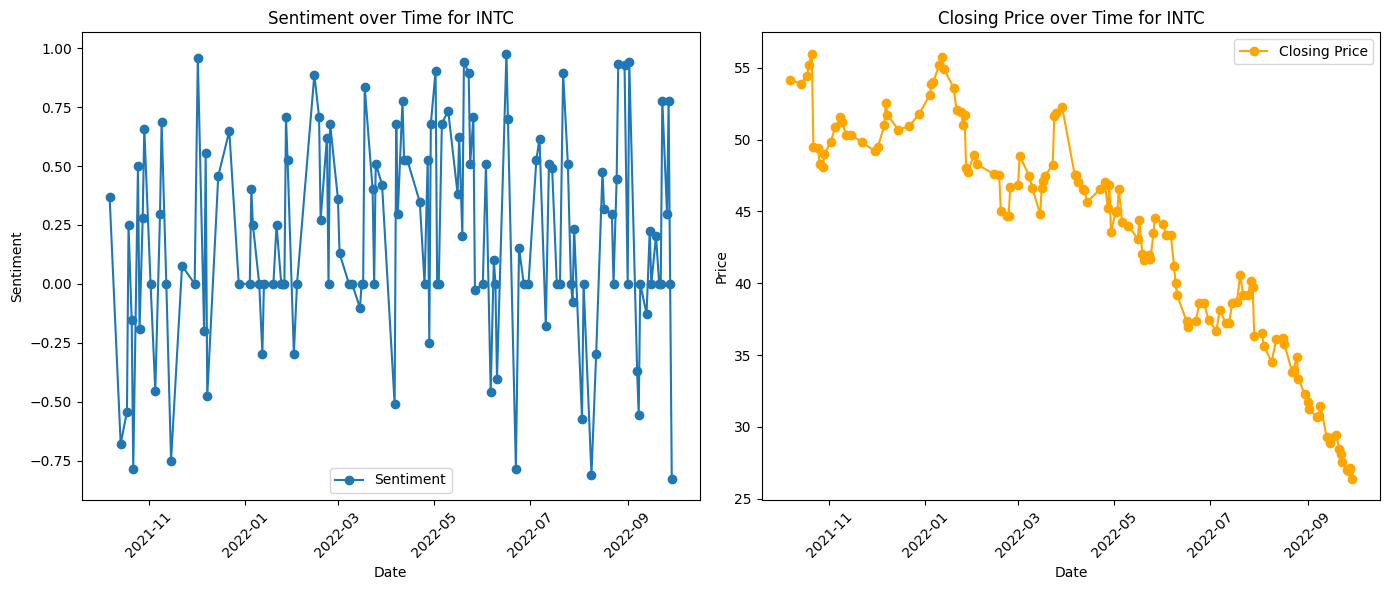

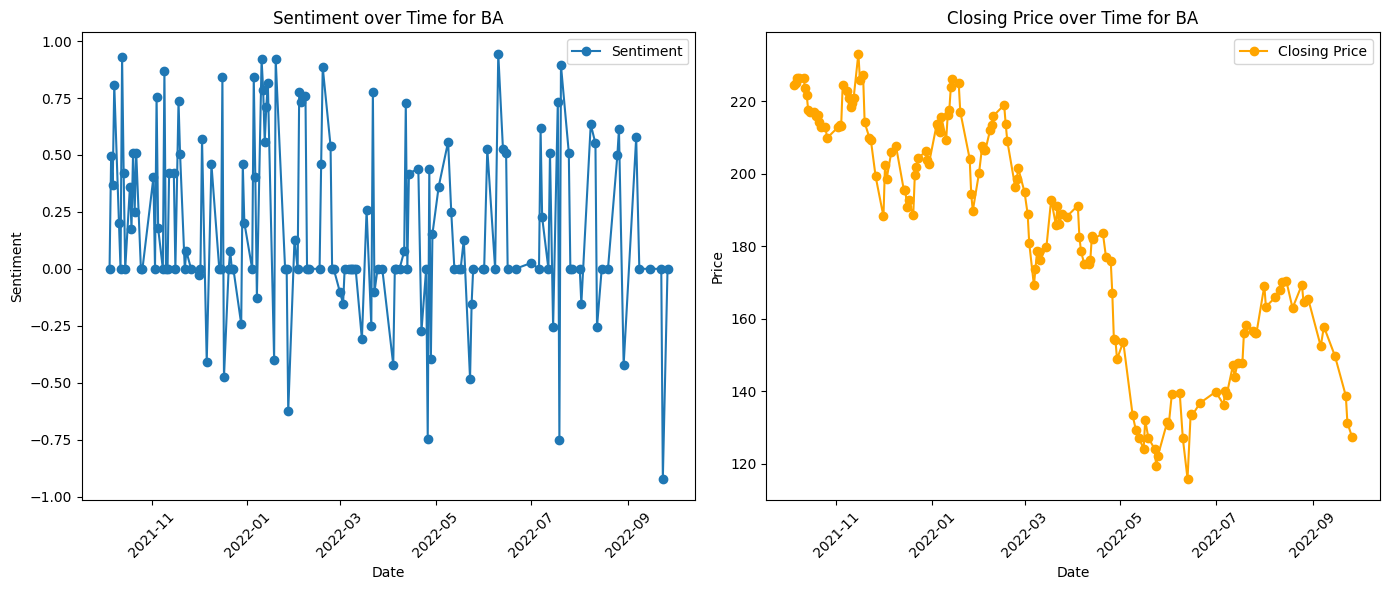

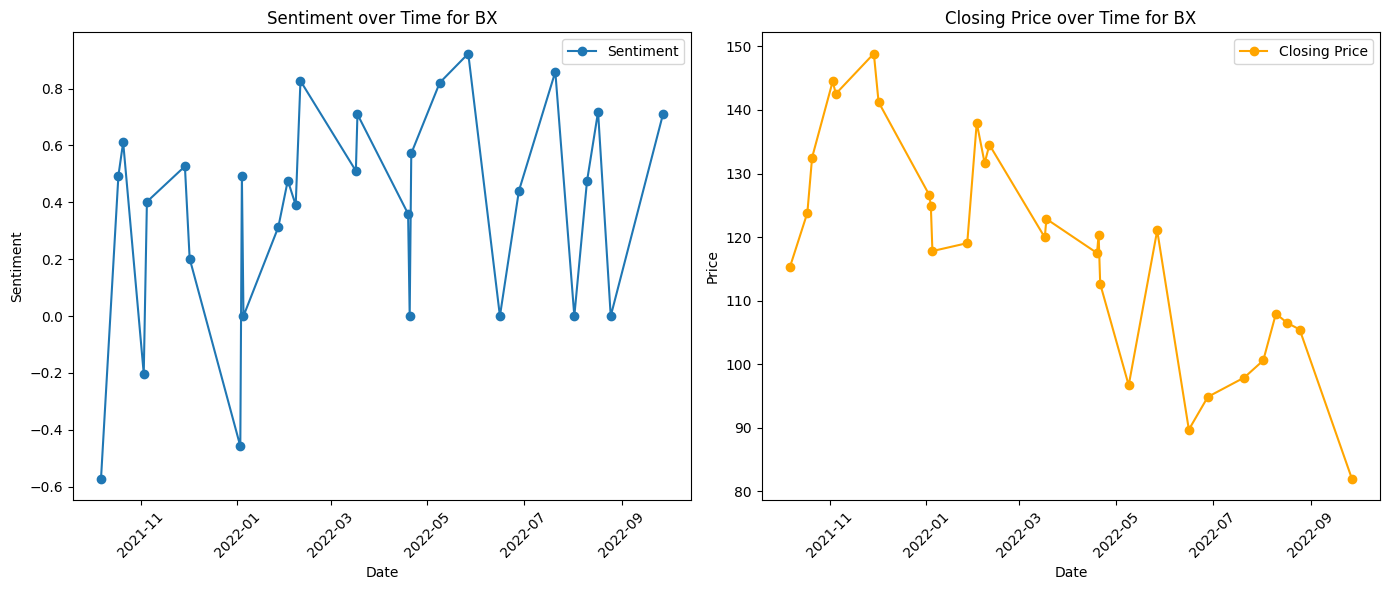

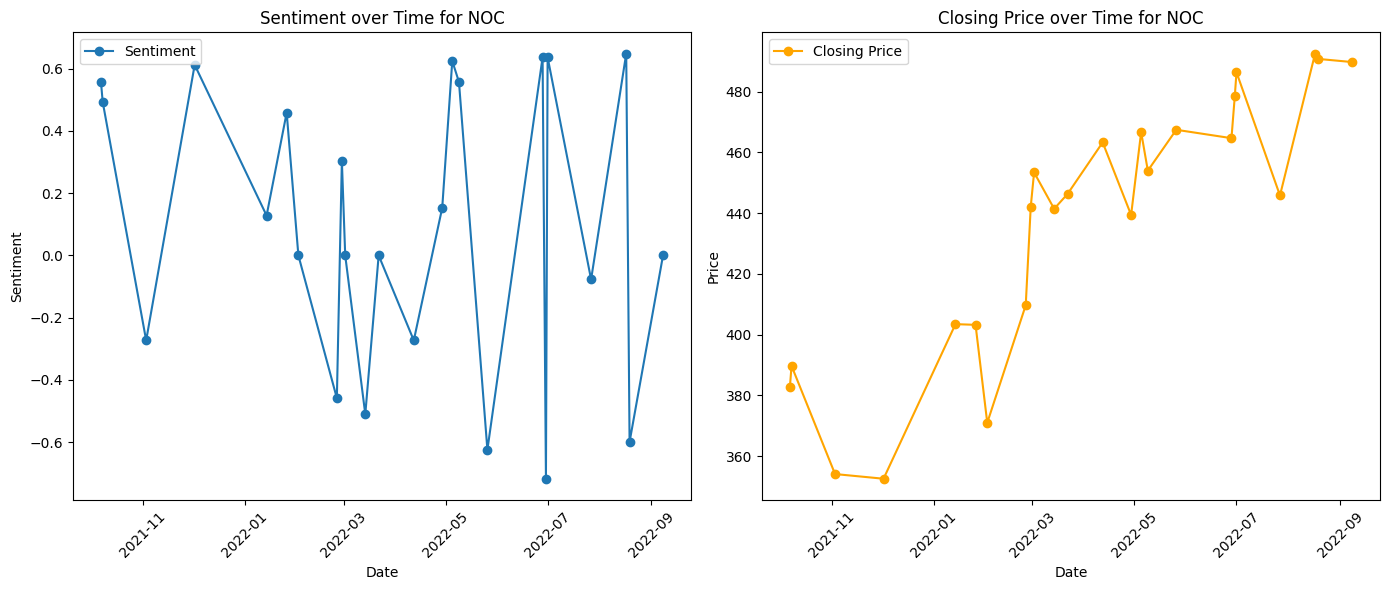

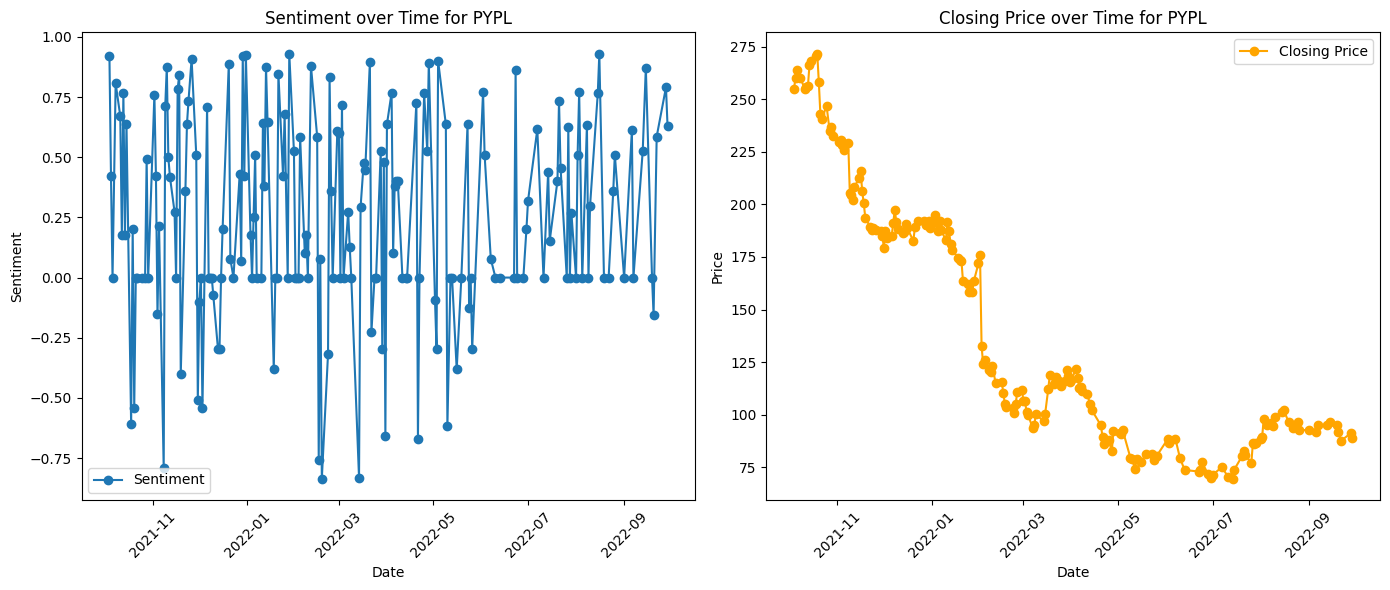

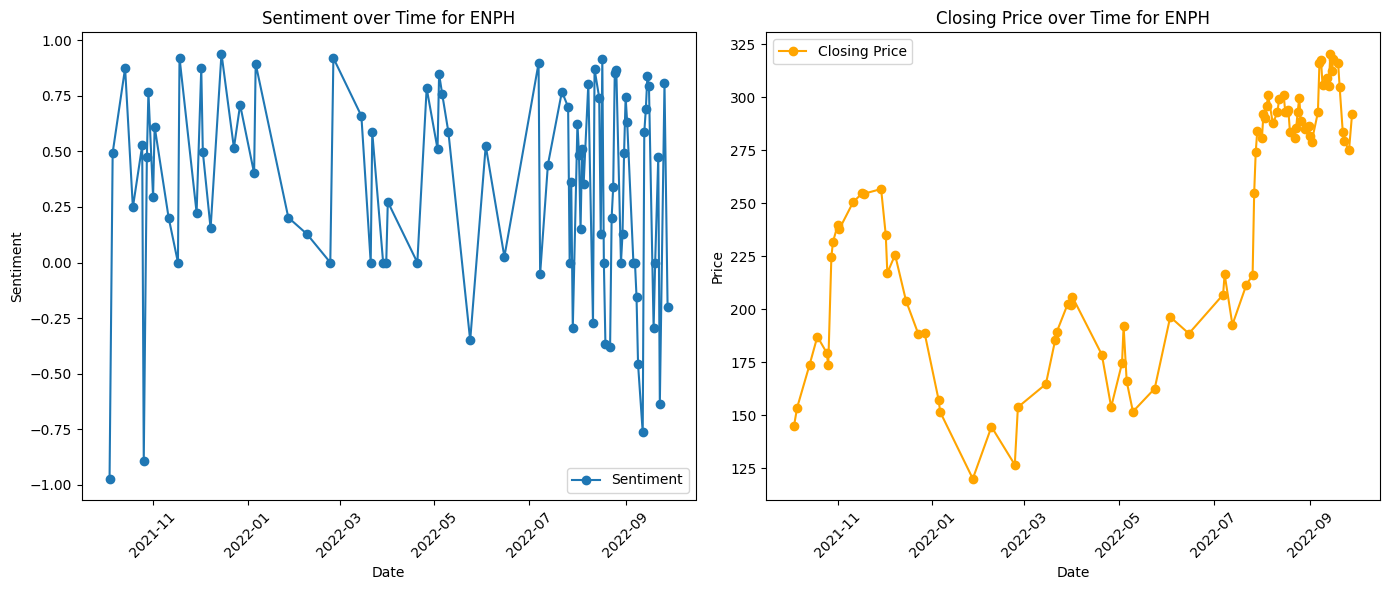

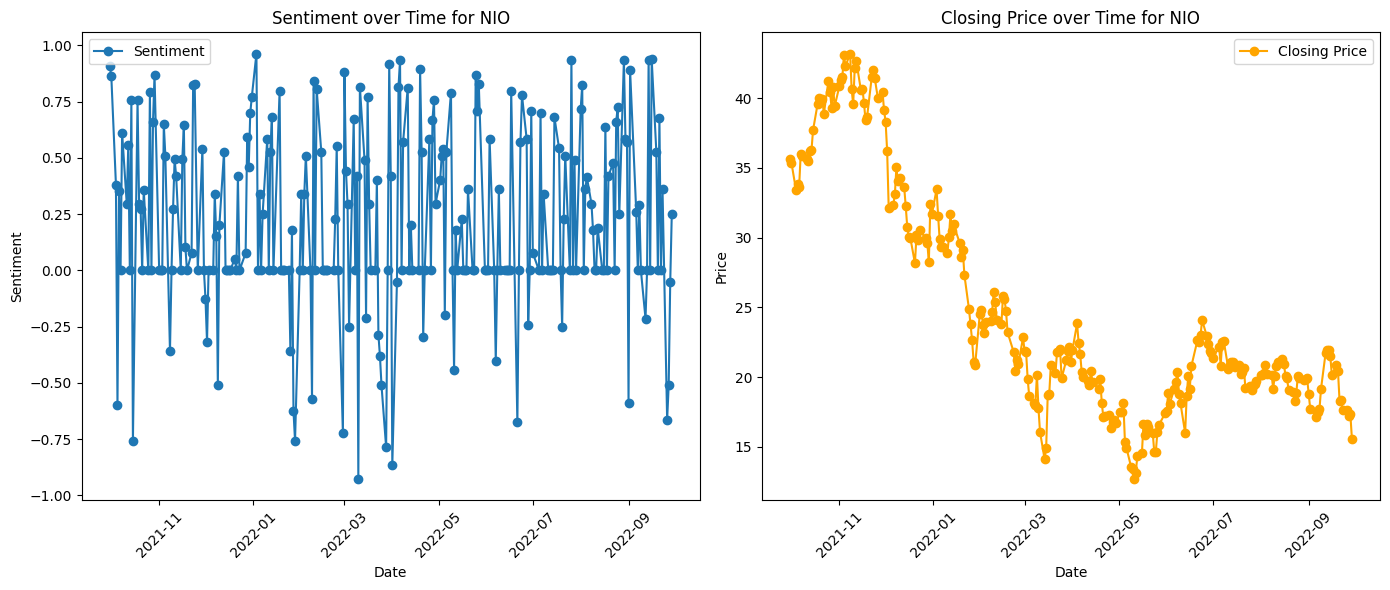

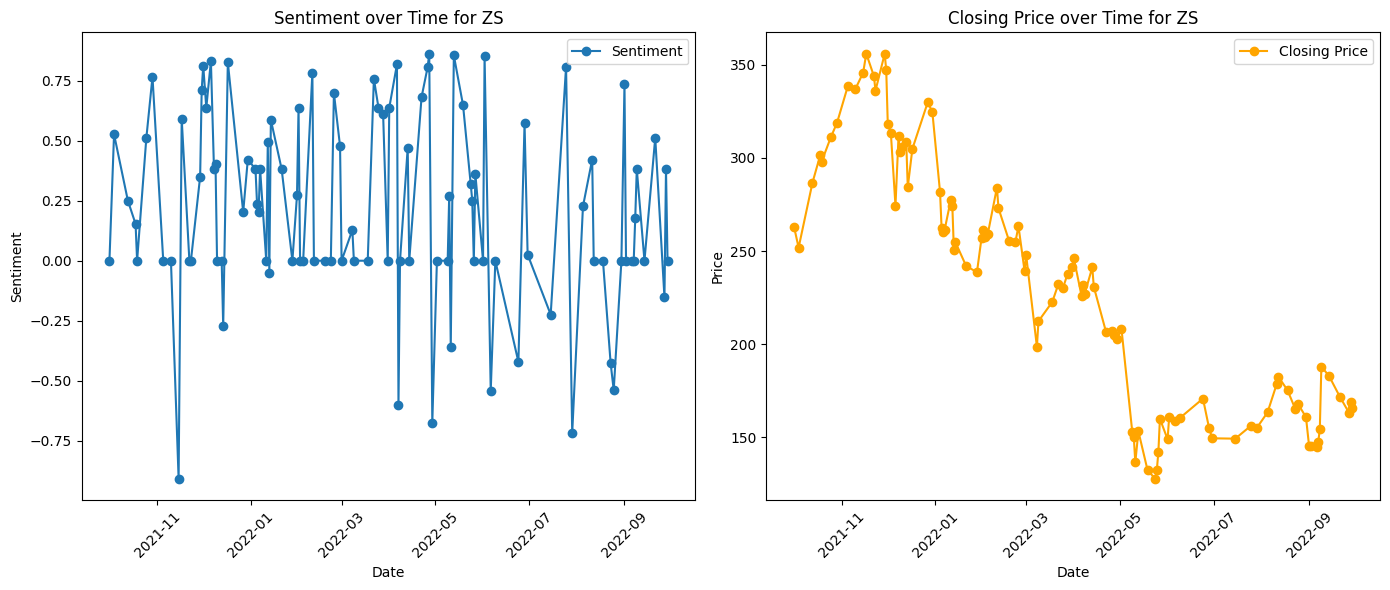

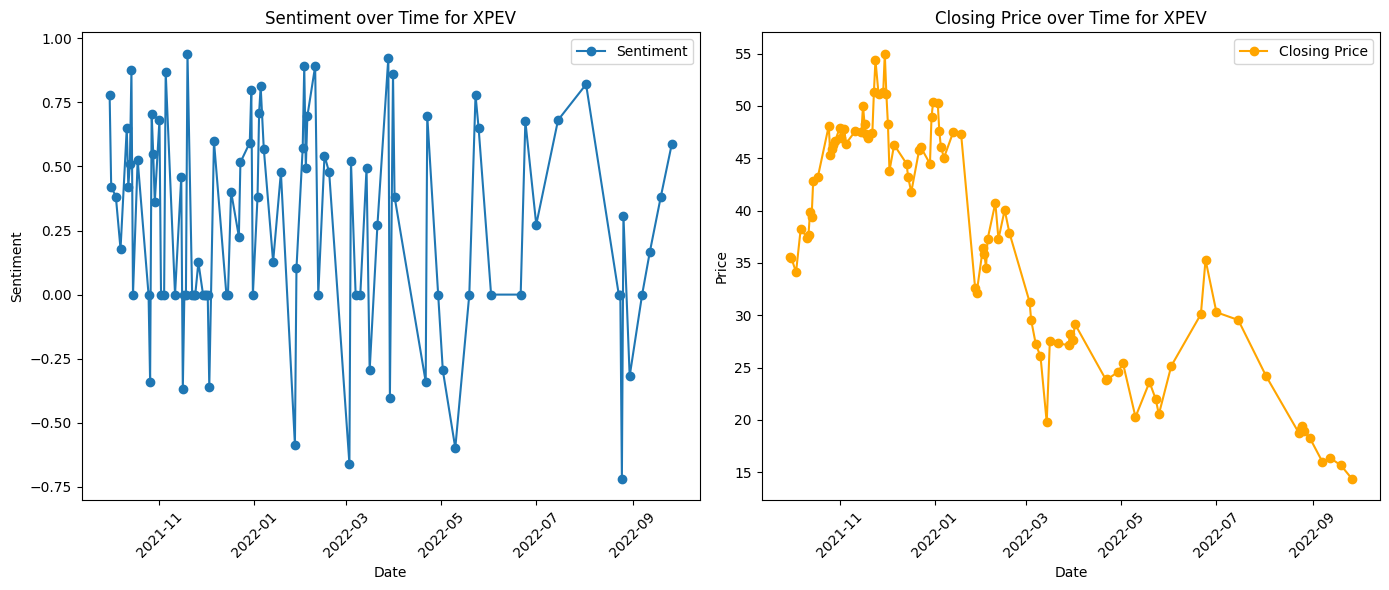

In [53]:
for stock in df['Stock Name'].unique():
    stock_data = df[df['Stock Name'] == stock]
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  
    axes[0].plot(stock_data['Date'], stock_data['Sentiment'], label='Sentiment', marker='o')
    axes[0].set_title(f'Sentiment over Time for {stock}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Sentiment')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)  

    axes[1].plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='orange', marker='o')
    axes[1].set_title(f'Closing Price over Time for {stock}')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price')
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=45)  
    plt.tight_layout()
    plt.show()

In [54]:
df = df.dropna(subset=['Sentiment', 'Price_Diff'])

In [55]:
sentiment_price_correlation = df.groupby('Stock Name').apply(lambda x: x['Sentiment'].corr(x['Price_Diff']) if len(x) > 1 else None).reset_index(name='Sentiment_Price_Correlation')
sentiment_price_correlation = sentiment_price_correlation.dropna()
print(sentiment_price_correlation)

   Stock Name  Sentiment_Price_Correlation
0        AAPL                     0.098200
1         AMD                     0.102083
2        AMZN                     0.016436
3          BA                    -0.053774
4          BX                     0.092919
5        COST                     0.019818
6         CRM                    -0.011219
7         DIS                    -0.011502
8        ENPH                    -0.004689
9           F                    -0.194372
10       GOOG                     0.002459
11       INTC                    -0.077982
12         KO                     0.004586
13       META                     0.024788
14       MSFT                     0.029077
15       NFLX                     0.016807
16        NIO                     0.013931
17        NOC                    -0.100663
18         PG                     0.040237
19       PYPL                     0.096584
20       TSLA                     0.042357
21        TSM                     0.046838
22         

C:\Users\BHAVANA\AppData\Local\Temp\ipykernel_8588\3314506933.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sentiment_price_correlation = df.groupby('Stock Name').apply(lambda x: x['Sentiment'].corr(x['Price_Diff']) if len(x) > 1 else None).reset_index(name='Sentiment_Price_Correlation')
